In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [17]:
def geography(one, twho, three, four):
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

one = 138
two = 141
three = 34
four = 37
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(one, two, three, four)

[0.000e+00 1.000e+00 2.000e+00 ... 1.858e+03 1.859e+03 1.860e+03]


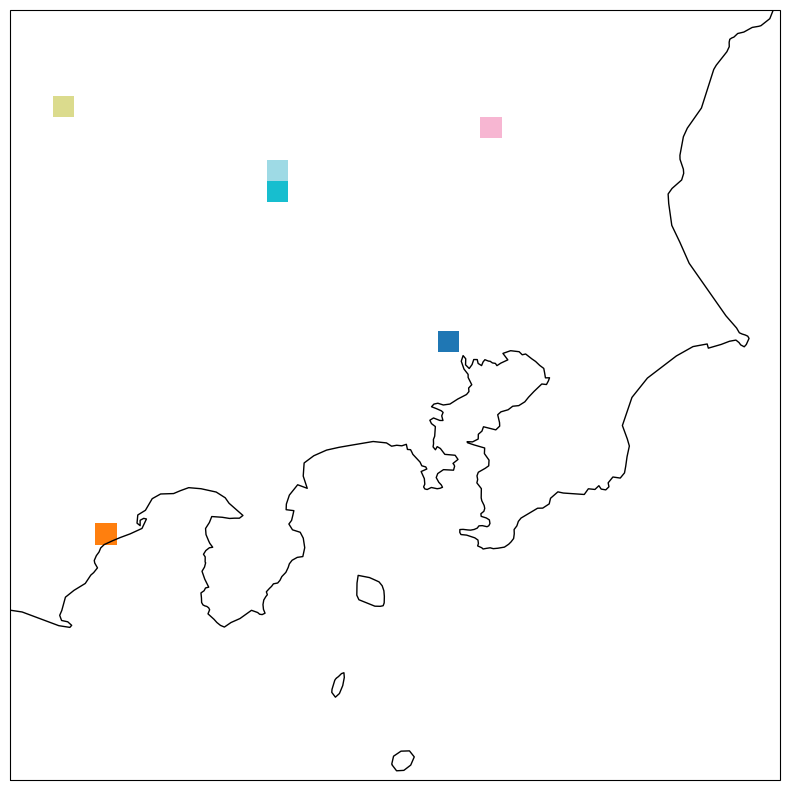

In [15]:
#################################3
# city center visualize
#################################3


h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
ctycnt_path = f'{h08dir}/dat/cty_cnt_/gpw4/city_clrd0000.gl5'
ctycnt_gl5 = np.fromfile(ctycnt_path, dtype='float32').reshape(2160, 4320)
ctycnt_cropped = ctycnt_gl5[upperindex:lowerindex, leftindex:rightindex]
ctycnt_masked = np.ma.masked_where(ctycnt_cropped==0, ctycnt_cropped)

# check if unique value existis for city center
unq = np.unique(ctycnt_gl5)
print(unq)

# draw
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ctycnt_masked,
               extent=img_extent, transform=projection, cmap='tab20')
ax.coastlines()

#west, east, south, north = 138, 141, 34, 37
#ax.set_xlim(west, east)
#ax.set_ylim(south, north)

plt.show()

In [ ]:
one = 138
two = 141
three = 34
four = 37
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(one, two, three, four)